### Aluno: Wagner Massayuki Nakasuga

# Projeto final - Titanic

## Introdução

O Titanic foi um navio de passageiros operado pela White Star Line. Sua construção teve início em 1909 e foi lançado ao mar em 1911. Ele foi apresentado como o navio mais luxuoso e seguro do seu tempo, sendo até mesmo considerado como impossível de naufragar. A embarcação partiu de Southampton no dia 10 de abril de 1912 em direção a Nova Iorque, porém no dia 14 de abril ele colidiu com um iceberg às 23h40 min e afundou no dia seguinte com mais de 1500 pessoas a bordo. Este evento acabou tornando o Titanic como um dos navios mais conhecidos da história e foi inspiração para vários filmes.

Sobre os dados do Titanic a serem analisados, as informações mais relevantes são sobre os passageiros sobreviventes e quais as características dessas pessoas. Dessa forma, a nálise desse projeto focará em buscar essas características.

### Descrição dos dados:

    - PassengerId - Identificação dos passageiros
    - Survived - Sobreviventes (0 = não, 1 = sim)
    - Pclass - Classe do bilhete (1 = 1st, 2 = 2nd, 3 = 3rd)
    - Name - Nome do passageiro
    - Sex - Sexo do passageiro
    - Age - Idade do passageiro
    - SibSp - Número de irmãos e cônjuges a bordo
    - Parch - Número de pais e filhos a bordo
    - Ticket - Número do bilhete
    - Fare - Tarifa do passageiro
    - Cabin - Número da Cabine
    - Embarked - Portão de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Perguntas a serem respondidas no projeto:

1. Qual a proporção entre homens e mulheres sobreviventes?
2. A classe da tarifa tem relação com os sobreviventes?
3. Os sobreviventes eram compostos de crianças, jovens e idosos?
4. Por que tantos homens adultos sobrevieram enquanto muitas mulheres e crianças morreram?
5. Quais os limites de preços das tarifas de cada classe e qual a idade média dos passageiros de cada uma delas?

In [3]:
# importando os dados .csv
df = pd.read_csv('titanic-data-6.csv')
df.head() # olhando os dados de uma forma geral

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Analisando o número de linhas e colunas
df.shape

(891, 12)

# Preparação e limpeza de dados

Inicialmente vou verificar se não existem dados duplicados.

In [5]:
df.duplicated().sum()

0

Não foram encontradas linhas duplicadas sendo assim vou dar prosseguimento à análise de dados sem preocupações em estar analisando dados repetidos.

O passo seguinte é analisar quais colunas não tem importância para o estudo.

Aparentemente, a Coluna Embarked não parece ter muita utilidade, porém antes de removê-la vou verificar se ela tem relação com a classe dos passageiros.

In [6]:
# verificando se a coluna Embarked está relacionada com a classe do bilhete
df.groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

Em princípio, os 3 portões de embarque foram utilizados por todas as classes sem existir uma tendência forte, sendo assim não parece existir relação com quem tinha mais ou menos dinheiro. Agora vou comparar com os sobreviventes.

In [7]:
# verificando se a coluna Embarked está relacionada com os sobreviventes
df.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

Novamente, não parece existir alguma tendência, dessa forma vou remover essa coluna. As colunas Ticket, Name e PassengerId são informações muito específicas de cada passageiro e não tem o porquê mostrar tendência sobre a pessoa ter sobrevivido ou não, sendo assim vou retirar essas colunas também.

In [8]:
# removendo as colunas: 'PassengerId', 'Name', 'Ticket', 'Embarked' 
df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [9]:
df.head() # verificando se as colunas foram removidas

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


Agora, vou verificar os dados faltantes.

In [10]:
# verificando se existe algum dado faltante
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
# verificando quantos valores NaN existem.
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

Antes de remover ou preencher os dados faltantes, vou analisar caso a caso. Primeiramente, vou observar a coluna Cabin.

In [12]:
# verificando se a coluna Cabin está relacionada com a classe do bilhete
df.groupby('Pclass')['Cabin'].count()

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64

O número de passageiros da primeira classe com cabines é muito maior do que os da segunda e terceira classe. Aparentemente, essas duas últimas classes não possuiam cabines ou não eram demarcadas como as que aparecem identificadas comsiglas. Então os valores vazios vou preenche-los com strings vazias para não remover as linhas.

In [13]:
# preenchendo os espaços vazios com a string ' '.
df['Cabin'].fillna(' ', inplace=True)

In [14]:
# Verificando se deu certo
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
dtype: int64

E, por fim, a coluna Age. Essa coluna também possui muitos valores faltantes e não posso apenas remover essas linhas sem entender o que está acontecendo, pois esta coluna pode sim fornecer alguma tendência.

In [15]:
# visualização inicial da coluna Age com dados NaN
df[df.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
5,0,3,male,NaN,0,0,8.4583,
17,1,2,male,NaN,0,0,13.0000,
19,1,3,female,NaN,0,0,7.2250,
26,0,3,male,NaN,0,0,7.2250,
28,1,3,female,NaN,0,0,7.8792,
29,0,3,male,NaN,0,0,7.8958,
31,1,1,female,NaN,1,0,146.5208,B78
32,1,3,female,NaN,0,0,7.7500,
36,1,3,male,NaN,0,0,7.2292,
42,0,3,male,NaN,0,0,7.8958,


Olhando apenas a tabela acima não é possível concluir alguma coisa, então vou usar histogramas para ver a estrutura desses dados.

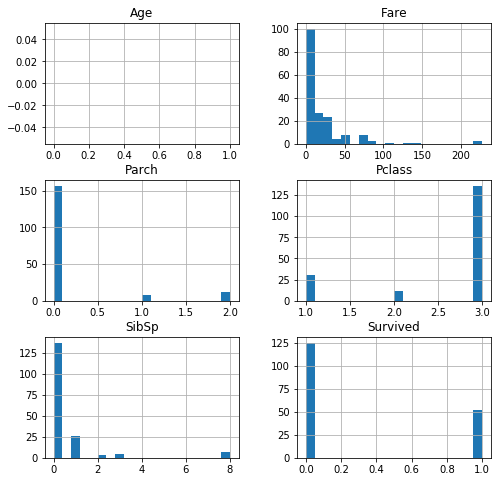

In [16]:
df[df.Age.isnull()].hist(figsize=(8,8), bins=20);

Fazendo uma análise de gráfico por gráfico, temos:
1. A primeira figura (Age) aparece vazia porque estou analisando a coluna idades com linhas vazias. 
2. A segunda (Fare) mostra que a maioria dos passageiros são os que pagaram menos tarifa, provavelmente a terceira classe. 
3. A terceira (Parch) mostra que a maioria das pessoas não estavam com pais e filhos. 
4. A quarta (Pclass) mostra que a maioria era da terceira classe e confirma a informação da segunda figura, em que a maioria pagou menos tarifa.
5. A quinta (SibSp) mostra que a maioria não possui a irmãos e conjuges. 
6. A maioria não sobreviveu.

Desses histogramas, é possível obter algumas tendências. Daqui é possível dizer que a maioria desses passageiros eram de classe baixa, sem família e não sobreviveram. Então, para não retirar essas linhas vou preenchê-los com a idade média dos passageiros, pois assim não perco informação de ninguém.

In [17]:
# Como só a coluna Age está vazia vou preenche-la sem especificar a coluna
df.fillna(df.mean(), inplace=True)

In [18]:
# verificando se os dados foram preenchidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Até agora foi verificado se existiam dados duplicados e dados faltantes. Não foi encontrado linhas duplicadas e os dados faltantes foram resolvidos. Então daqui em diante vou dar início a análise dos dados.

# Análise de dados

Basicamente, utilizarei histogramas e estatística básica para fazer uma análise inicial dos dados.

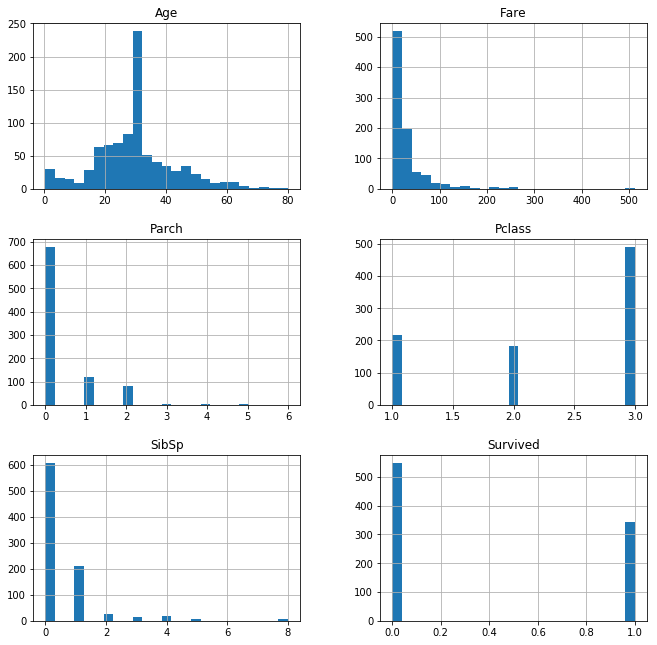

In [19]:
df.hist(figsize=(11,11), bins=25);

Dos histogramas temos que:

1. (Age) - Neste histograma temos que a maioria dos passageiros tinham idade por volta de 30 anos.
2. (Fare) - A maioria dos passageiros pagou um preço baixo na tarifa.
3. (Parch) - A grande maioria dos passageiros estava sem pais e filhos.
4. (Pclass) - Aparentemente, mais de 50% era da terceira classe.
5. (SibSp) - Muitos passageiros estavam desacompanhados de irmãos e cônjuges.
6. (Survived) - Quase o dobro de passageiros não sobreviveu ao naufrago.

E, para quantificar os dados, uma análise de estatística básica será apresentada abaixo:

In [20]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Para os sobreviventes, temos que 38% dos passageiros sobreviveram. A coluna Pclass não faz sentido ser analisada, pois não tem significado físico. Das idades, temos desde bebês (0,42 anos ou ~4 meses) a idosos (80 anos), onde a maioria das pessoas tem entre 22 e 35 anos. Vale lembrar que os valores da coluna Age vazios foram preenchidos com a média das idades, por isso o valor de 29,7 aparece com tanto destaque no histograma. Basicamente, as passoas estavam desacompanhadas de família, porém algumas pessoas estavam com muitos irmãos e/ou muitos filhos. Quanto a tarifa, elas tiveram destaque entre 8 e 31 da moeda utilizada na época, porém alguns não pagaram e alguns pagaram muito (512).

## Primeira pergunta é: Qual a proporção entre homens e mulheres sobreviventes?

Para responder a essa pergunta, vou separar os dados em sobreviventes e não-sobreviventes.

In [22]:
survived = df.query('Survived == 1')
died =df.query('Survived == 0')

In [23]:
survived.head() # conferindo os dados

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,
3,1,1,female,35.0,1,0,53.1000,C123
8,1,3,female,27.0,0,2,11.1333,
9,1,2,female,14.0,1,0,30.0708,


In [24]:
died.head() # conferindo os dados

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.000000,1,0,7.2500,
4,0,3,male,35.000000,0,0,8.0500,
5,0,3,male,29.699118,0,0,8.4583,
6,0,1,male,54.000000,0,0,51.8625,E46
7,0,3,male,2.000000,3,1,21.0750,


In [25]:
# calculando a média de sobrevientes por sexo
survived.groupby('Sex')['Age'].mean()

Sex
female    28.979263
male      27.631705
Name: Age, dtype: float64

Pelo resultado acima, a média de idade dos sobreviventes são: 29 anos para mulheres e 28 para homens. Agora dividindo os dados entre homens e mulheres sobreviventes, temos:

In [26]:
# Divisão entre passageiros do sexo masculino e feminino
survived_female = survived.query('Sex=="female"')
survived_male = survived.query('Sex == "male"')

E a diferença entre homens e mulheres sobreviventes é:

In [27]:
print('Número de mulheres sobreviventes: ', len(survived_female))
print('Número de homens sobreviventes: ', len(survived_male))
print('Diferença entre o número de homens e mulheres sobreviventes: ',
     len(survived_female) - len(survived_male))

Número de mulheres sobreviventes:  233
Número de homens sobreviventes:  109
Diferença entre o número de homens e mulheres sobreviventes:  124


In [28]:
# Dividindo as sobrevientes por classe
survived_female['Pclass'].value_counts()

1    91
3    72
2    70
Name: Pclass, dtype: int64

In [29]:
# Dividindo os sobreviventes do sexo masculino por classe
survived_male['Pclass'].value_counts()

3    47
1    45
2    17
Name: Pclass, dtype: int64

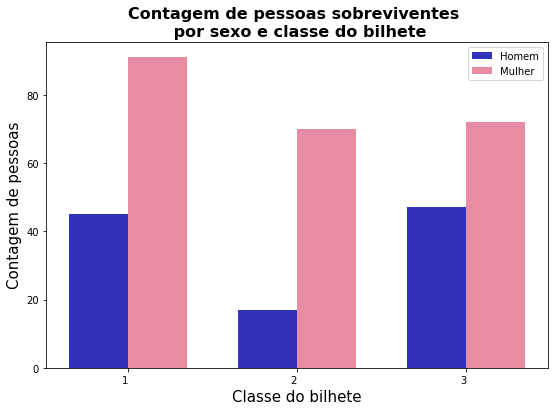

In [30]:
# Gráfico de barras com valores multiplos
male = [45, 17, 47] # contagem de homens 
female = [91, 70, 72] # contagem de mulheres 
Pclass = ['1', '2', '3'] # Classe do bilhete

pos = np.arange(3) # posições das barras
tam = .35 # distancia das barras.

fig, ax = plt.subplots(figsize=(9,6)) # para plotar vários gráficos em uma mesma figura.
# Ambos os plots seguem a mesma ideia, a posição da barra é dada pelo primeiro 
# argumento:
# - para a barra ficar a esquerda do centro do tick em x
# + para a barra ficar a direita do centro do tick em x.
plt1 = ax.bar(pos-tam/2, male, tam, color=(0.1,0.1,0.7,0.9), label='Homem')
plt2 = ax.bar(pos+tam/2, female, tam, color=(0.9,0.5,0.6,0.9), label='Mulher')

ax.set_title('Contagem de pessoas sobreviventes \n por sexo e classe do bilhete', fontsize=16, fontweight='bold')
ax.set_xlabel('Classe do bilhete', fontsize=15)
ax.set_ylabel('Contagem de pessoas', fontsize=15)

ax.set_xticks(pos) 

ax.set_xticklabels(Pclass, rotation=0, ha='right') 
ax.legend(); 

Pelo resultado obtido, temos que mais mulheres sobreviveram em relação aos homens e isso ocorreu em todas as classes de bilhete. Na primeira classe, o número de mulheres sobrevivente foi quase o dobro do número de homens; na segunda classe, o número de homens foi quase 25% o número de mulheres e na terceira classe os homens foram 65% do número de mulheres.

# Segunda pergunta: A classe da tarifa tem relação com os sobreviventes?

Para responder a essa pergunta, será necessário separar os não-sobreviventes por classe.

In [31]:
# separando os não-sobreviventes por classe
died_male = died.query('Sex == "male"')
died_female = died.query('Sex == "female"')

In [32]:
print('Número de mulheres não sobreviventes: ', len(died_female))
print('Número de homens não sobreviventes: ', len(died_male))
print('Diferença entre o número de homens e mulheres não sobreviventes: ',
     len(died_male) - len(died_female))

Número de mulheres não sobreviventes:  81
Número de homens não sobreviventes:  468
Diferença entre o número de homens e mulheres não sobreviventes:  387


Pelos resultados até o momento, os homens foram os que mais sofreram com o desastre.

In [33]:
# Não-sobreviventes do sexo masculino separados por classe
died_male['Pclass'].value_counts()

3    300
2     91
1     77
Name: Pclass, dtype: int64

In [34]:
# Não-sobreviventes do sexo feminino separados por classe
died_female['Pclass'].value_counts()

3    72
2     6
1     3
Name: Pclass, dtype: int64

Para melhorar a visualização dos dados, essas informações serão apresentadas nos histogramas abaixo, primeiro a comparação entre sobreviventes e não-sobreviventes do sexo feminino e depois do masculino.

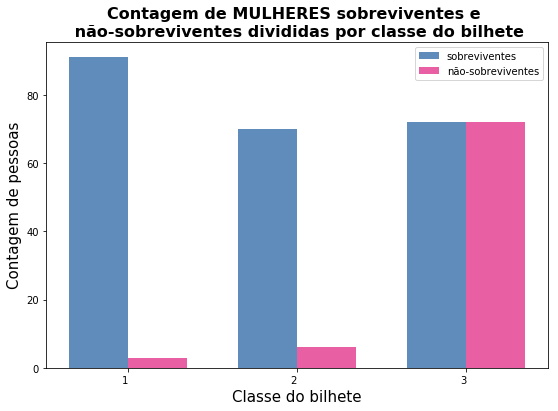

In [35]:
# Gráfico de barras entre mulheres sobreviventes e não sobreviventes e suas classes do bilhete
survivedf = [91, 70, 72] # contagem de mulheres sobreviventes
nsurvivedf = [3, 6, 72] # contagem de mulheres não-sobreviventes
Pclass = ['1', '2', '3'] # Classe do bilhete

pos = np.arange(3) # posições das barras
tam = .35 # distancia das barras.

fig, ax = plt.subplots(figsize=(9,6)) # para plotar vários gráficos em uma mesma figura.
# Ambos os plots seguem a mesma ideia, a posição da barra é dada pelo primeiro 
# argumento:
# - para a barra ficar a esquerda do centro do tick em x
# + para a barra ficar a direita do centro do tick em x.
plt1 = ax.bar(pos-tam/2, survivedf, tam, color=(0.3,0.5,0.7,0.9), label='sobreviventes')
plt2 = ax.bar(pos+tam/2, nsurvivedf, tam, color=(0.9,0.3,0.6,0.9), label='não-sobreviventes')

ax.set_title('Contagem de MULHERES sobreviventes e \n não-sobreviventes divididas por classe do bilhete', 
             fontsize=16, 
             fontweight='bold')
ax.set_xlabel('Classe do bilhete', fontsize=15)
ax.set_ylabel('Contagem de pessoas', fontsize=15)

ax.set_xticks(pos) 

ax.set_xticklabels(Pclass, rotation=0, ha='right') 
ax.legend(); 

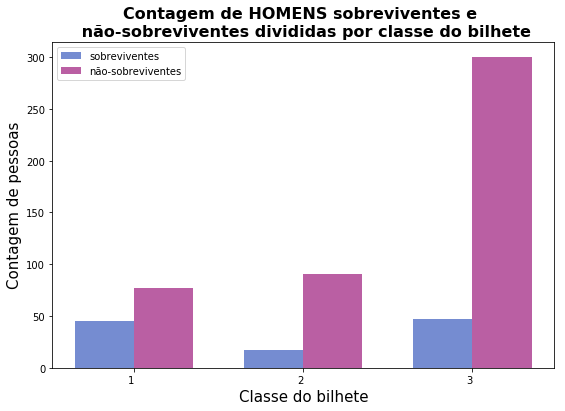

In [36]:
# Gráfico de barras entre homens sobreviventes e não sobreviventes e suas classes do bilhete
survivedm = [45, 17, 47] # contagem de homens sobreviventes
nsurvivedm = [77, 91, 300] # contagem de homens não-sobreviventes
Pclass = ['1', '2', '3'] # Classe do bilhete

pos = np.arange(3) # posições das barras
tam = .35 # distancia das barras.

fig, ax = plt.subplots(figsize=(9,6)) # para plotar vários gráficos em uma mesma figura.
# Ambos os plots seguem a mesma ideia, a posição da barra é dada pelo primeiro 
# argumento:
# - para a barra ficar a esquerda do centro do tick em x
# + para a barra ficar a direita do centro do tick em x.
plt1 = ax.bar(pos-tam/2, survivedm, tam, color=(0.4,0.5,0.8,0.9), label='sobreviventes')
plt2 = ax.bar(pos+tam/2, nsurvivedm, tam, color=(0.7,0.3,0.6,0.9), label='não-sobreviventes')

ax.set_title('Contagem de HOMENS sobreviventes e \n não-sobreviventes divididas por classe do bilhete', 
             fontsize=16, 
             fontweight='bold')
ax.set_xlabel('Classe do bilhete', fontsize=15)
ax.set_ylabel('Contagem de pessoas', fontsize=15)

ax.set_xticks(pos) 

ax.set_xticklabels(Pclass, rotation=0, ha='right') 
ax.legend(); 

Na pergunta anterior, vimos que o número de mulheres sobreviventes, em todas as classes, foi superior ao dos homens. Agora, com os dados separados por sexo vemos que:


    Para as mulheres: As mulheres da primeira classe praticamente todas se salvaram, assim como as da segunda. Um resultado inesperado foi que as mulheres da terceira classe tiveram uma proporção igual de sobreviventes e não-sobreviventes. E, por fim, é possível observar que as mulheres da primeira e segunda classe tiveram uma vantagem muito maior para se salvarem do que as da terceira.

    Para homens: Os homens por sua vez, tiveram o número de mortos maior que o dos sobreviventes em todas as classes, inclusive na primeira, onde para as mulheres elas foram quase que salvas em sua totalidade. Porém, na terceira classe o resultado foi bem pior, nesta o número de mortos foi bem maior que o dos sobreviventes.

Dos resultados obtidos até o momento, podemos dizer que as mulheres da primeira classe foram as que mais se salvaram enquanto que os homens da terceira classe foram os que mais morreram. Ou seja, parece que o sexo e a classe social beneficiaram uma parcela dos 38% dos sobreviventes.

# Terceira pergunta: Os sobreviventes eram compostos de crianças, jovens e idosos?

Inicialmente, os dados serão verificados por grupos:

    - menores que 18 anos serão as crianças;
    - entre 18 e 70 anos serão os adultos;
    - maiores que 70 anos os idosos.

A função abaixo será utilizada para analisar os vários dados produzidos até aqui.

In [37]:
def idade (lista):
    """Função para separar os passageiros por grupos de gerações
    jovem são os menores de 18 anos
    adulto são os entre 18 e 70 anos
    idosos são os com mais de 70 anos
    return fornece a quantidade de cada variável"""
    jovem = 0
    adulto = 0
    idoso = 0
    for row in lista:
        if row <= 18:
            jovem += 1
        elif 18 < row < 70:
            adulto += 1
        elif row >= 70:
            idoso += 1
    return print('criança: {}, \nadulto: {}, \nidoso: {}'.format(jovem, adulto, idoso))

A primeira análise será feita utilizando os dados sem separação:

In [38]:
idade(df['Age'])

criança: 139, 
adulto: 745, 
idoso: 7


Temos 139 crianças, 745 adultos e 7 idosos antes do náufrago. Agora, só analisando os sobreviventes.

In [39]:
idade(survived['Age'])

criança: 70, 
adulto: 271, 
idoso: 1


Das 139 crianças, apenas 70 sobreviveram; dos 745 adultos 271 sobreviveram e dos 7 idosos apenas 1 sobreviveu. E agora, observando os que não sobreviveram.

In [40]:
idade(died['Age'])

criança: 69, 
adulto: 474, 
idoso: 6


E, o resultado acima são os não-sobreviventes; 69 crianças, 474 adultos e 6 idosos.

Dividindo os sobreviventes por classe de bilhete:

In [41]:
firstclass_survived = survived.query('Pclass == 1')
secondclass_survived = survived.query('Pclass == 2')
thirdclass_survived = survived.query('Pclass == 3')

In [42]:
# separando a primeira classe em grupos de idade
idade(firstclass_survived['Age']) # primeira classe

criança: 14, 
adulto: 121, 
idoso: 1


In [43]:
#separando a segunda classe em grupos de idade
idade(secondclass_survived['Age']) # segunda classe

criança: 23, 
adulto: 64, 
idoso: 0


In [44]:
#separando a terceira classe em grupos de idade
idade(thirdclass_survived['Age']) # terceira classe

criança: 33, 
adulto: 86, 
idoso: 0


Dos resultados podemos observar que a maioria das crianças sobreviventes se encontrava na terceira classe; a maioria dos adultos era da primeira classe assim como o idoso. Para uma melhor visualização os dados serão plotados no histograma abaixo:

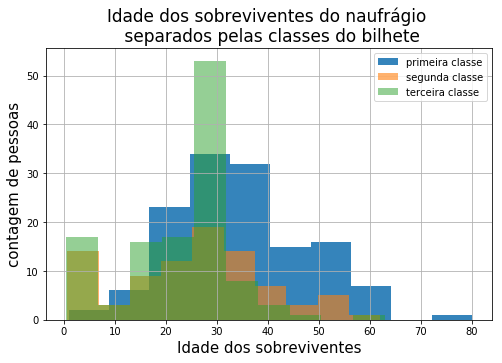

In [45]:
firstclass_survived['Age'].hist(label= "primeira classe", alpha=0.9, figsize=(8,5))
secondclass_survived['Age'].hist(label = "segunda classe", alpha=0.6)
thirdclass_survived['Age'].hist(label = "terceira classe", alpha=0.5)
plt.title('Idade dos sobreviventes do naufrágio \n separados pelas classes do bilhete', fontsize=17)
plt.xlabel('Idade dos sobreviventes', fontsize=15)
plt.ylabel('contagem de pessoas', fontsize=15)
plt.legend();

Com os dados obtidos, podemos ver que das 139 crianças que embarcaram, somente 70 sobreviveram e pelo histograma podemos ver que a maioria era da terceira classe. Dos adultos, a maior concentração de sobreviventes se encontram na primeira classe e, como já vimos anteriormente, essa maioria eram de mulheres. E, infelizmente, apenas um idoso sobreviveu e ele pertence a primeira classe. Podemos ver também que a concentração de pessoas masi velhas é da primeira classe, enquanto que a mais jovem é da terceira.

# Quarta pergunta: Por que tantos homens adultos sobreviveram enquanto muitas mulheres e crianças morreram?

Quando assistimos a filmes de naufrágio, sempre ouvimos a frase: "mulheres e crianças primeiro!". Considerando que nem todas as mulheres e nem todas as crianças foram salvas e alguns homens foram, a pergunta é, por que eles foram salvos no lugar das mulheres e crianças?

Para responder a essa pergunta, o primeiro procedimento a ser feito é separar os passageiros do sexo masculino por classes.

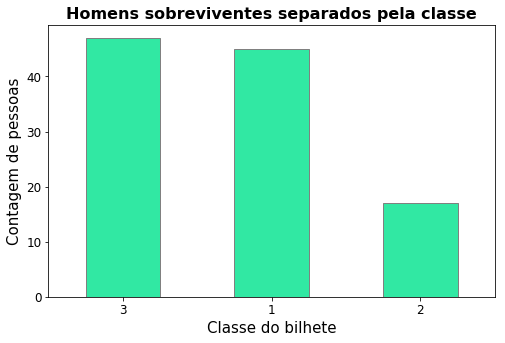

In [46]:
survived_male['Pclass'].value_counts().plot(kind='bar', color = (0.1,0.9,0.6,0.9), 
                                            edgecolor= "gray",
                                           figsize=(8,5))
plt.title('Homens sobreviventes separados pela classe', fontweight='bold', fontsize=16)
plt.xlabel('Classe do bilhete', fontsize=15)
plt.ylabel('Contagem de pessoas', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=0);

Podemos observar que dos poucos homens que sobreviveram, a maioria era da terceira e primeira classe, respectivamente, e alguns da segunda. Vale levar em consideração que o número de homens da terceira classe era bem superior aos das demais. Então faz sentido eles terem uma quantidade maior de sobreviventes. 

Agora é necessário saber sobre a idade deles para sabermos quantas são crianças. Para isso, vou separar as classes por grupos de idades.

In [47]:
idade(survived_male['Age'])

criança: 24, 
adulto: 84, 
idoso: 1


No geral, dos 109 homens sobreviventes 24 são crianças, 84 são adultos e 1 é idoso. Agora separando por classes temos:

In [48]:
# separando os sobreviventes do sexo masculino por classes 
firstclass_survived_male = survived_male.query('Pclass == 1')
secondclass_survived_male = survived_male.query('Pclass == 2')
thirdclass_survived_male = survived_male.query('Pclass == 3')

In [49]:
idade(firstclass_survived_male['Age']) # passageiros masculinos da primeira classe

criança: 4, 
adulto: 40, 
idoso: 1


In [50]:
idade(secondclass_survived_male['Age']) # passageiros masculinos da segunda classe

criança: 9, 
adulto: 8, 
idoso: 0


In [51]:
idade(thirdclass_survived_male['Age']) # passageiros masculinos da terceira classe

criança: 11, 
adulto: 36, 
idoso: 0


O número de adultos foi superior aos outros grupos sendo que apenas um dos sobreviventes do sexo masculino era idoso. Para uma melhor comparação os dados erão graficados no histograma abaixo:

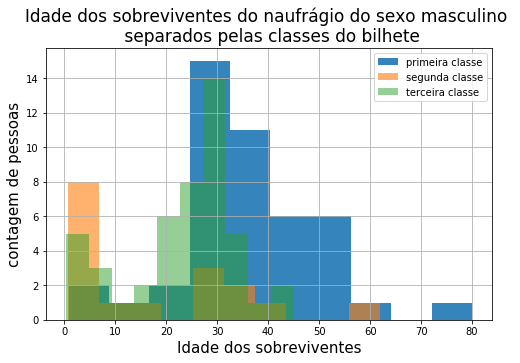

In [52]:
firstclass_survived_male['Age'].hist(label= "primeira classe", alpha=0.9, figsize=(8,5))
secondclass_survived_male['Age'].hist(label = "segunda classe", alpha=0.6)
thirdclass_survived_male['Age'].hist(label = "terceira classe", alpha=0.5)
plt.title('Idade dos sobreviventes do naufrágio do sexo masculino \n separados pelas classes do bilhete', 
          fontsize=17)
plt.xlabel('Idade dos sobreviventes', fontsize=15)
plt.ylabel('contagem de pessoas', fontsize=15)
plt.legend();

Das 70 crianças sobreviventes, 24 eram homens e são mostrados no início do histograma. Garotos de todas as classes foram salvos. Dos idosos apenas um sobreviveu e pertencia à primeira classe. Dos adultos, poucos foram os da segunda classe, a maioria era da terceira seguida da primeira classes. 

O último fator a ser analisado e que pode ter relação com o salvamento desses homens é eles terem família a bordo, sendo assim será feita uma análise dos sobreviventes com família logo abaixo:

In [53]:
print(len(survived_male)) # quantidade de passageiros do sexo masculino sobreviventes
survived_male['SibSp'].value_counts() # quantidade de pessoas separadas pela quantidade de irmãos e conjuges

109


0    73
1    32
2     3
4     1
Name: SibSp, dtype: int64

In [54]:
survived_male['Parch'].value_counts() # quantidade de pessoas com pais e filhos

0    80
1    19
2    10
Name: Parch, dtype: int64

Dos 109 passageiros do sexo masculino 36 possuíam irmãos e/ou cônjuges e 29 estavam acompanhados com pais e filhos. Esses passageiros serão agrupados pois pode haver alguma intersecção nos dados e isso acabaria comprometendo os resultados.

In [55]:
# agrupando os dados SibSp e Parch
survived_male.groupby('SibSp')['Parch'].value_counts()

SibSp  Parch
0      0        64
       2         5
       1         4
1      0        14
       1        14
       2         4
2      0         2
       1         1
4      2         1
Name: Parch, dtype: int64

Pela tabela acima 64 passageiros do sexo masculino não possuíam parentes, dessa forma, apenas 45 passageiros possuíam famílias. É possível que as pessoas com famílias devam ter sido beneficiadas de alguma forma, porém não é certeza, pois famílias também morreram no naufrágio. Quanto aos 64 homens desacompanhados podem ter se salvado de várias maneiras que não tenha sido utilizando botes salva-vidas, isso pode ser um motivo de tantas pessoas da terceira classe terem se salvado, mas seriam necessários mais variáveis para podermos dizer mais sobre isso.

# Quinta pergunta: Quais os limites de preços das tarifas de cada classe e qual a idade média dos passageiros de cada uma delas?
Essa pergunta é interessante, pois quem não gostaria de viajar na primeira classe?

Inicialmente, é importante saber o valor mínimo e máximo da tarifa.

In [56]:
df.Fare.describe() # descrição geral das tarifas

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Os valores variam de 0 a 512 com média de 32. Agora separando por classe, temos:

In [57]:
first_class = df.query('Pclass == 1')
second_class = df.query('Pclass == 2')
third_class = df.query('Pclass == 3')

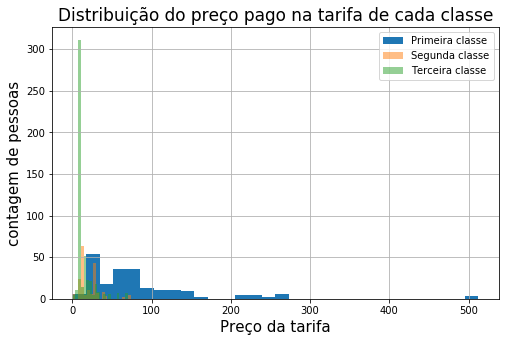

In [58]:
first_class['Fare'].hist(figsize=(8,5),label='Primeira classe', bins=30)
second_class['Fare'].hist(label='Segunda classe', bins=20, alpha=0.5)
third_class['Fare'].hist(label='Terceira classe', alpha=0.5, bins=20)

plt.title('Distribuição do preço pago na tarifa de cada classe',fontsize=17)
plt.xlabel('Preço da tarifa', fontsize=15)
plt.ylabel('contagem de pessoas', fontsize=15)

plt.legend();

O interessante desse histograma é que tem pessoas na primeira classe que pagaram valores próximos a zero ou de graça, talvez sejam as crianças. Algumas das pessoas da segunda e terceira classe pagaram valores de tarifas que se enquadram na primeira classe. Para verificar o intervalo de preços e idade média das pessoas de cada classe vou utilizar a ferramenta .describe().

In [59]:
first_class.describe() # análise estatística da primeira classe

,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.0,216.000000,216.000000,216.000000,216.000000
mean,0.629630,1.0,37.048118,0.416667,0.356481,84.154687
std,0.484026,0.0,14.046369,0.611898,0.693997,78.380373
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.0,29.000000,0.000000,0.000000,30.923950
50%,1.000000,1.0,35.000000,0.000000,0.000000,60.287500
75%,1.000000,1.0,47.250000,1.000000,0.000000,93.500000
max,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


Na primeira classe, podemos ver que a média de idades é 37 anos e que  as tarifas variaram de 0 a 512 com média de 84.

In [60]:
second_class.describe()  # análise estatística da segunda classe

,Survived,Pclass,Age,SibSp,Parch,Fare
count,184.000000,184.0,184.000000,184.000000,184.000000,184.000000
mean,0.472826,2.0,29.866958,0.402174,0.380435,20.662183
std,0.500623,0.0,13.573825,0.601633,0.690963,13.417399
min,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,0.000000,2.0,29.699118,0.000000,0.000000,14.250000
75%,1.000000,2.0,36.000000,1.000000,1.000000,26.000000
max,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


A idade média da segunda classe é 30 anos e as tarifas variaram de 0 a 74 com média de 21.

In [61]:
third_class.describe()  # análise estatística da terceira classe

,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.0,491.000000,491.000000,491.000000,491.000000
mean,0.242363,3.0,26.403259,0.615071,0.393075,13.675550
std,0.428949,0.0,10.815245,1.374883,0.888861,11.778142
min,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,0.000000,3.0,20.250000,0.000000,0.000000,7.750000
50%,0.000000,3.0,29.699118,0.000000,0.000000,8.050000
75%,0.000000,3.0,29.699118,1.000000,0.000000,15.500000
max,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


Na terceira classe, a idade média é 26 e as tarifas variaram de 0 a 70, com média de preço de 17.

E, respondendo a quinta pergunta "Quais os limites de preços das tarifas de cada classe e qual a idade média dos passageiros de cada uma delas?" Verificando as médias de idade e preço da tarifa, temos que os passageiros da primeira classe são os mais velhos, com a média de idade de 36 anos, seguida da segunda classe que é de 30 anos e terceira classe, a mais jovem, com 26 anos. A média de preços condiz com a classe, sendo 84 para a primeira, 21 para a segunda e 17 para a terceira.

Por curiosidade, qual a característica das pessoas da primeira classe que não pagaram tarifa?

In [62]:
first_class.query('Fare == 0') # passageiros da primeira classe que não pagaram tarifas

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
263,0,1,male,40.000000,0,0,0.0,B94
633,0,1,male,29.699118,0,0,0.0,
806,0,1,male,39.000000,0,0,0.0,A36
815,0,1,male,29.699118,0,0,0.0,B102
822,0,1,male,38.000000,0,0,0.0,


Esses passageiros são do sexo masculino, adultos, sem família e não sobreviveram. Talvez eles eram os trabalhadores importantes do navio, como por exemplo o engenehiro do barco.

# Conclusão

Dos passageiros que viajaram no Titanic apenas 38% deles sobreviveram. Dentre eles a maioria eram mulheres, principalmente da primeira classe, no qual foram quase 100% salvas. Em contrapartida, a maioria dos não-sobreviventes eram do sexo masculino da terceira classe. Mostrando que a classe da tarifa e sexo tiveram grande contribuição na sobrevivência das pessoas que viajaram nesse navio. 

Dos sobreviventes, nem todas as crianças que embarcaram sobreviveram ao acidente e apenas um idoso dos 7 que viajaram voltou com vida. Alguns homens adultos se salvaram do naufrágio, enquanto que tiveram mulheres e crianças que não, mesmo sendo prioridade salvá-las antes dos homens. É possível, que grande parte deles tenham se salvado sem a utilização de botes-salva-vidas, porém isso não é possível se afirmar pois não há dados o suficiente para isso.

Algumas tarifas da primeira classe eram tão caras que fez com que a média do valor da primeira classe fosse bem superior às demais. Quanto as médias de idades dos passageiros de cada classe mostraram que os mais velhos eram da primeira e os mais jovens da terceira.

Algumas limitações foram encontradas durante as análises do banco de dados de tal forma que prejudicou uma melhor conclusão. Por exemplo, a falta de informações de algumas idades foram substituídas pela média das idades informadas, isso resolveu, mas não é o dado correto. Outra ausência que fez falta foi a da informação das cabines. Sem ela não foi possível correlacionar o valor da tarifa e a quantidade de pessoas por cabine. E por fim, faltou dados sobre como os sobreviventes se salvaram, como por exemplo se utilizaram botes salva-vidas ou se encontraram algum meio alternativo. Essas informações enriqueceriam bastante toda a análise e discussão deste projeto. 

# Bibliografia

http://python-graph-gallery.com/barplot/

https://stackoverflow.com/

https://programandociencia.com/2014/12/30/graficos-bidimensionais-com-python-parte-ii/

https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93